In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_parquet("data/dataset_procesada.parquet", engine="pyarrow")
df

,exportaciones,importaciones,precio_petroleo,igae,pib,consumo_final,inversion_total,tasa_inflacion
fecha,,,,,,,,
2008-10-01,-0.454482,-0.299724,-4.956194,0.037897,0.038064,0.581546,0.414413,-0.060587
2009-01-01,-1.812458,-0.796024,-1.256884,-0.886494,-0.886777,-0.798865,-0.811319,-1.995298
2009-04-01,0.356706,0.603206,1.470491,1.032076,1.032046,0.188213,0.485071,4.119722
2009-07-01,0.512052,0.556132,0.794157,-0.273556,-0.273605,-0.096622,-0.070220,-1.670576
2009-10-01,0.117188,0.069532,0.725736,0.123238,0.123502,0.652331,0.510964,-0.177565
...,...,...,...,...,...,...,...,...
2023-10-01,-0.949204,-0.144119,-0.283497,1.441632,1.441919,1.999727,0.736056,-0.302286
2024-01-01,-1.801562,-1.529920,-0.049535,-1.893434,-1.893470,-1.957061,-1.796246,0.082974
2024-04-01,1.673592,0.960185,0.375641,0.491718,0.491684,-0.176902,1.100735,0.528649


In [3]:
def crear_modelo_regresion(df):
    """
    Crea y evalúa un modelo de regresión múltiple para predecir el PIB de Bolivia
    
    Parámetros:
    df: DataFrame con las columnas 'pib', 'exportaciones', 'importaciones', 'igae', 'precio_petroleo'
    """
    
    # Definir variables independientes (X) y dependiente (y)
    variable_dependiente = 'pib'
    X = df.drop(columns=[variable_dependiente])
    y = df[variable_dependiente]

    
    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, shuffle=True
    )
    
    print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
    print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")
    
    # Crear y entrenar el modelo
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    
    # Realizar predicciones
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)
    
    return modelo, X_train, X_test, y_train, y_test, y_pred_train, y_pred_test

In [4]:
def evaluar_modelo(modelo, X_train, X_test, y_train, y_test, y_pred_train, y_pred_test):
    """
    Evalúa el modelo de regresión múltiple y muestra métricas de rendimiento
    """
    
    print("="*60)
    print("EVALUACIÓN DEL MODELO DE REGRESIÓN MÚLTIPLE")
    print("="*60)
    
    # Coeficientes del modelo
    variables = X_train.columns
    print("\n1. COEFICIENTES DEL MODELO:")
    print(f"Intercepto: {modelo.intercept_:.4f}")
    for i, var in enumerate(variables):
        print(f"{var}: {modelo.coef_[i]:.4f}")
    
    # Métricas de entrenamiento
    print("\n2. MÉTRICAS DE ENTRENAMIENTO:")
    r2_train = r2_score(y_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"R² Score: {r2_train:.4f}")
    print(f"RMSE: {rmse_train:.4f}")
    print(f"MAE: {mae_train:.4f}")
    
    # Métricas de prueba
    print("\n3. MÉTRICAS DE PRUEBA:")
    r2_test = r2_score(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_test = mean_absolute_error(y_test, y_pred_test)
    
    print(f"R² Score: {r2_test:.4f}")
    print(f"RMSE: {rmse_test:.4f}")
    print(f"MAE: {mae_test:.4f}")
    
    # R² ajustado
    n = len(y_train)
    p = len(variables)
    r2_adj = 1 - (1 - r2_train) * (n - 1) / (n - p - 1)
    print(f"\n4. R² AJUSTADO: {r2_adj:.4f}")
    
    return {
        'r2_train': r2_train,
        'r2_test': r2_test,
        'rmse_train': rmse_train,
        'rmse_test': rmse_test,
        'mae_train': mae_train,
        'mae_test': mae_test,
        'r2_adjusted': r2_adj
    }

In [5]:
def graficar_resultados(y_train, y_test, y_pred_train, y_pred_test):
    """
    Genera gráficos para visualizar el rendimiento del modelo
    """
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Gráfico 1: Valores reales vs predicciones (entrenamiento)
    axes[0,0].scatter(y_train, y_pred_train, alpha=0.7, color='blue')
    axes[0,0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
    axes[0,0].set_xlabel('Valores Reales')
    axes[0,0].set_ylabel('Predicciones')
    axes[0,0].set_title('Entrenamiento: Valores Reales vs Predicciones')
    axes[0,0].grid(True, alpha=0.3)
    
    # Gráfico 2: Valores reales vs predicciones (prueba)
    axes[0,1].scatter(y_test, y_pred_test, alpha=0.7, color='green')
    axes[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[0,1].set_xlabel('Valores Reales')
    axes[0,1].set_ylabel('Predicciones')
    axes[0,1].set_title('Prueba: Valores Reales vs Predicciones')
    axes[0,1].grid(True, alpha=0.3)
    
    # Gráfico 3: Residuos (entrenamiento)
    residuos_train = y_train - y_pred_train
    axes[1,0].scatter(y_pred_train, residuos_train, alpha=0.7, color='blue')
    axes[1,0].axhline(y=0, color='r', linestyle='--')
    axes[1,0].set_xlabel('Predicciones')
    axes[1,0].set_ylabel('Residuos')
    axes[1,0].set_title('Residuos - Entrenamiento')
    axes[1,0].grid(True, alpha=0.3)
    
    # Gráfico 4: Residuos (prueba)
    residuos_test = y_test - y_pred_test
    axes[1,1].scatter(y_pred_test, residuos_test, alpha=0.7, color='green')
    axes[1,1].axhline(y=0, color='r', linestyle='--')
    axes[1,1].set_xlabel('Predicciones')
    axes[1,1].set_ylabel('Residuos')
    axes[1,1].set_title('Residuos - Prueba')
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


In [6]:
def analisis_residuos(y_train, y_pred_train):
    """
    Análisis de los residuos para verificar supuestos del modelo
    """
    residuos = y_train - y_pred_train
    
    print("\n5. ANÁLISIS DE RESIDUOS:")
    
    # Test de normalidad de residuos (Shapiro-Wilk)
    if len(residuos) <= 5000:  # Shapiro-Wilk tiene límite de muestra
        stat, p_value = stats.shapiro(residuos)
        print(f"Test de Normalidad (Shapiro-Wilk): p-valor = {p_value:.4f}")
        if p_value > 0.05:
            print("Los residuos siguen una distribución normal (p > 0.05)")
        else:
            print("Los residuos NO siguen una distribución normal (p ≤ 0.05)")
    
    # Estadísticas básicas de residuos
    print(f"Media de residuos: {np.mean(residuos):.6f}")
    print(f"Desviación estándar de residuos: {np.std(residuos):.4f}")
    
    # Durbin-Watson (aproximado para autocorrelación)
    dw = np.sum(np.diff(residuos)**2) / np.sum(residuos**2)
    print(f"Estadístico Durbin-Watson: {dw:.4f}")
    if 1.5 < dw < 2.5:
        print("No hay evidencia fuerte de autocorrelación")
    else:
        print("Posible autocorrelación en los residuos")

In [7]:
def hacer_prediccion(modelo, nuevos_datos):
    """
    Realiza predicciones con nuevos datos
    
    Parámetros:
    modelo: modelo entrenado
    nuevos_datos: array o DataFrame con las variables [exportaciones, importaciones, igae, precio_petroleo]
    """
    prediccion = modelo.predict(nuevos_datos)
    return prediccion

In [8]:
def crear_y_evaluar_modelo_completo(df):
    """
    Función principal que ejecuta todo el proceso
    """
    modelo, X_train, X_test, y_train, y_test, y_pred_train, y_pred_test = crear_modelo_regresion(df)
    metricas = evaluar_modelo(modelo, X_train, X_test, y_train, y_test, y_pred_train, y_pred_test)
    analisis_residuos(y_train, y_pred_train)
    graficar_resultados(y_train, y_test, y_pred_train, y_pred_test)
    
    return modelo, metricas

*Modelo sin variable predictora igae*

Tamaño del conjunto de entrenamiento: 52
Tamaño del conjunto de prueba: 13
EVALUACIÓN DEL MODELO DE REGRESIÓN MÚLTIPLE

1. COEFICIENTES DEL MODELO:
Intercepto: 0.0065
exportaciones: 0.2049
importaciones: 0.1110
precio_petroleo: -0.0076
consumo_final: 0.6440
inversion_total: 0.1221
tasa_inflacion: 0.1894

2. MÉTRICAS DE ENTRENAMIENTO:
R² Score: 0.8779
RMSE: 0.3221
MAE: 0.2614

3. MÉTRICAS DE PRUEBA:
R² Score: 0.9706
RMSE: 0.1978
MAE: 0.1517

4. R² AJUSTADO: 0.8617

5. ANÁLISIS DE RESIDUOS:
Test de Normalidad (Shapiro-Wilk): p-valor = 0.1257
Los residuos siguen una distribución normal (p > 0.05)
Media de residuos: 0.000000
Desviación estándar de residuos: 0.3221
Estadístico Durbin-Watson: 2.1241
No hay evidencia fuerte de autocorrelación


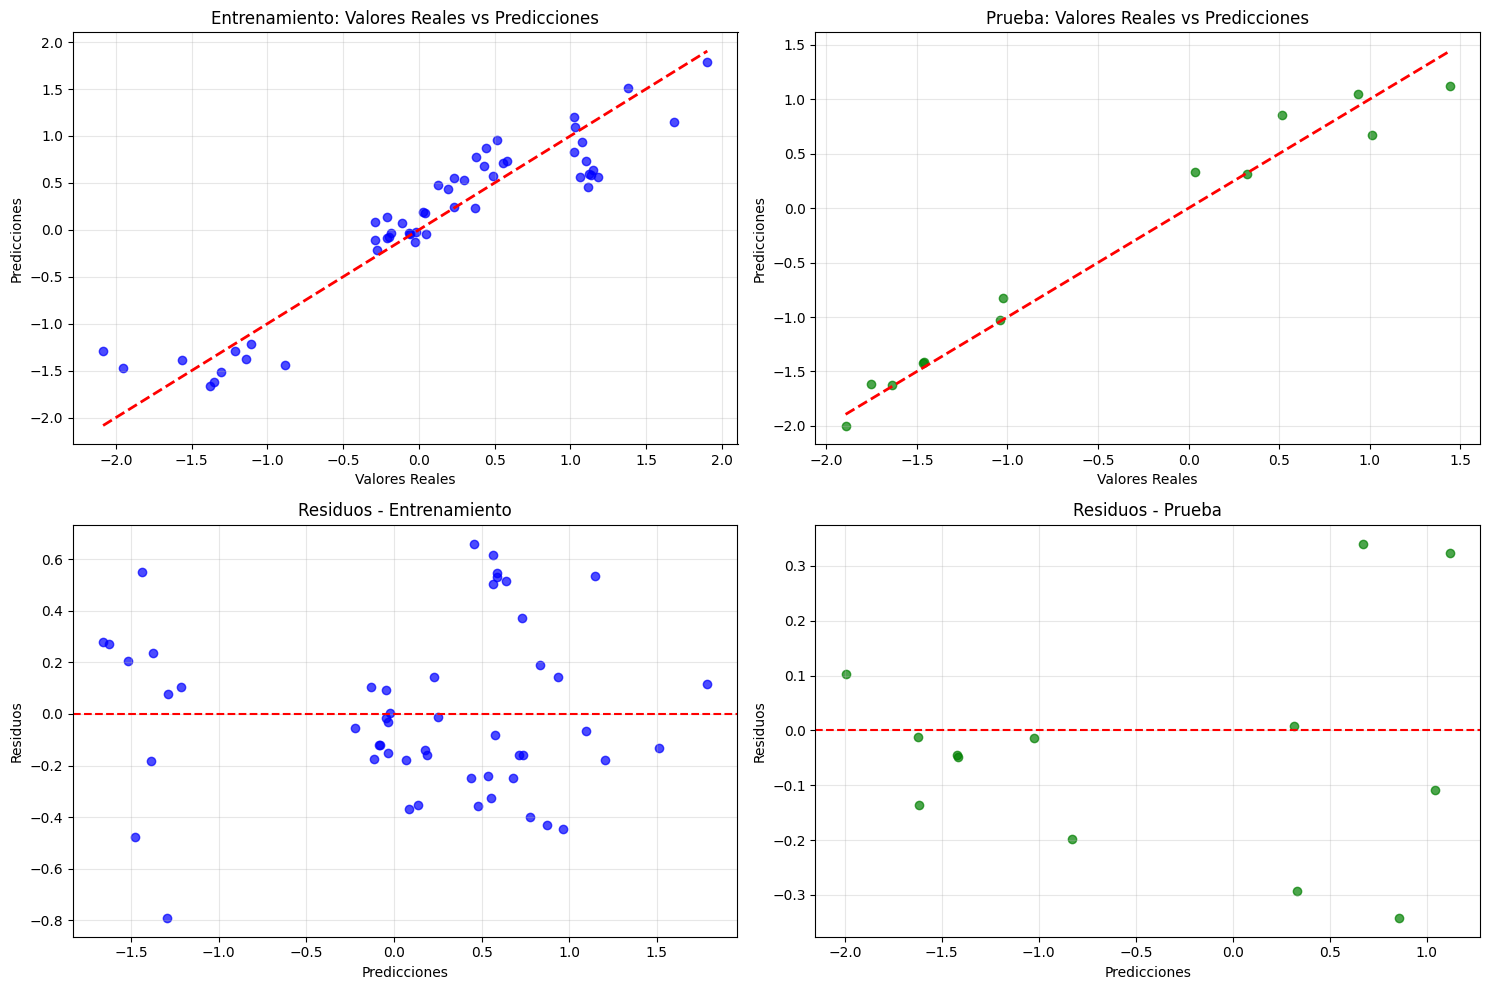

(LinearRegression(),
 {'r2_train': 0.8779296624222072,
  'r2_test': 0.9706413338468332,
  'rmse_train': 0.32212603076092144,
  'rmse_test': 0.19779944351337073,
  'mae_train': 0.26143831469187806,
  'mae_test': 0.15173957936367188,
  'r2_adjusted': 0.8616536174118348})

In [9]:
df1 = df.drop('igae', axis=1)
crear_y_evaluar_modelo_completo(df1)

*Modelo sin variables: igae, importaciones y consumo final*

Tamaño del conjunto de entrenamiento: 52
Tamaño del conjunto de prueba: 13
EVALUACIÓN DEL MODELO DE REGRESIÓN MÚLTIPLE

1. COEFICIENTES DEL MODELO:
Intercepto: -0.0108
exportaciones: 0.1763
precio_petroleo: 0.0614
inversion_total: 0.7559
tasa_inflacion: 0.0261

2. MÉTRICAS DE ENTRENAMIENTO:
R² Score: 0.7231
RMSE: 0.4852
MAE: 0.3212

3. MÉTRICAS DE PRUEBA:
R² Score: 0.8891
RMSE: 0.3845
MAE: 0.2574

4. R² AJUSTADO: 0.6995

5. ANÁLISIS DE RESIDUOS:
Test de Normalidad (Shapiro-Wilk): p-valor = 0.0012
Los residuos NO siguen una distribución normal (p ≤ 0.05)
Media de residuos: -0.000000
Desviación estándar de residuos: 0.4852
Estadístico Durbin-Watson: 2.2969
No hay evidencia fuerte de autocorrelación


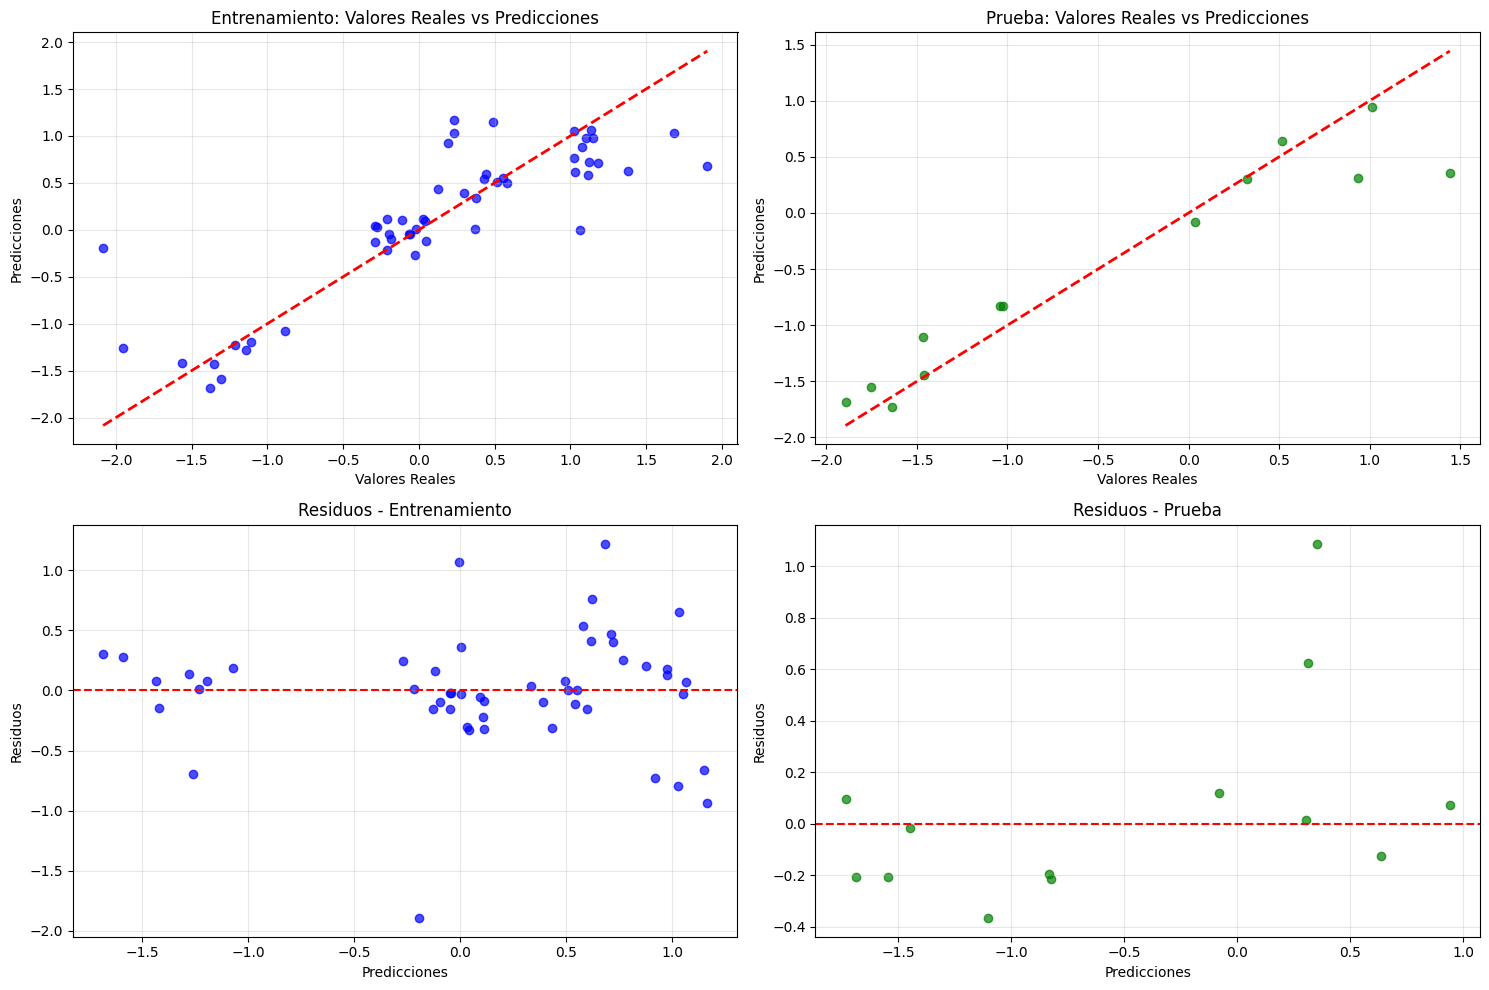

(LinearRegression(),
 {'r2_train': 0.7231035381519344,
  'r2_test': 0.8890503679187555,
  'rmse_train': 0.4851538159618558,
  'rmse_test': 0.3845208010608823,
  'mae_train': 0.32122289467081183,
  'mae_test': 0.25736128289432747,
  'r2_adjusted': 0.6995378818244394})

In [10]:
df2 = df.drop(['igae', 'importaciones', 'consumo_final'], axis=1)
crear_y_evaluar_modelo_completo(df2)

*Modelo sin variables: igae, exportaciones e inversion total*

En este modelo aun existe una correlacion entre importaciones y consumo final de 0.75

Tamaño del conjunto de entrenamiento: 52
Tamaño del conjunto de prueba: 13
EVALUACIÓN DEL MODELO DE REGRESIÓN MÚLTIPLE

1. COEFICIENTES DEL MODELO:
Intercepto: 0.0057
importaciones: 0.2783
precio_petroleo: 0.0650
consumo_final: 0.6901
tasa_inflacion: 0.2344

2. MÉTRICAS DE ENTRENAMIENTO:
R² Score: 0.8477
RMSE: 0.3598
MAE: 0.2869

3. MÉTRICAS DE PRUEBA:
R² Score: 0.9835
RMSE: 0.1481
MAE: 0.1360

4. R² AJUSTADO: 0.8348

5. ANÁLISIS DE RESIDUOS:
Test de Normalidad (Shapiro-Wilk): p-valor = 0.8312
Los residuos siguen una distribución normal (p > 0.05)
Media de residuos: -0.000000
Desviación estándar de residuos: 0.3598
Estadístico Durbin-Watson: 2.0079
No hay evidencia fuerte de autocorrelación


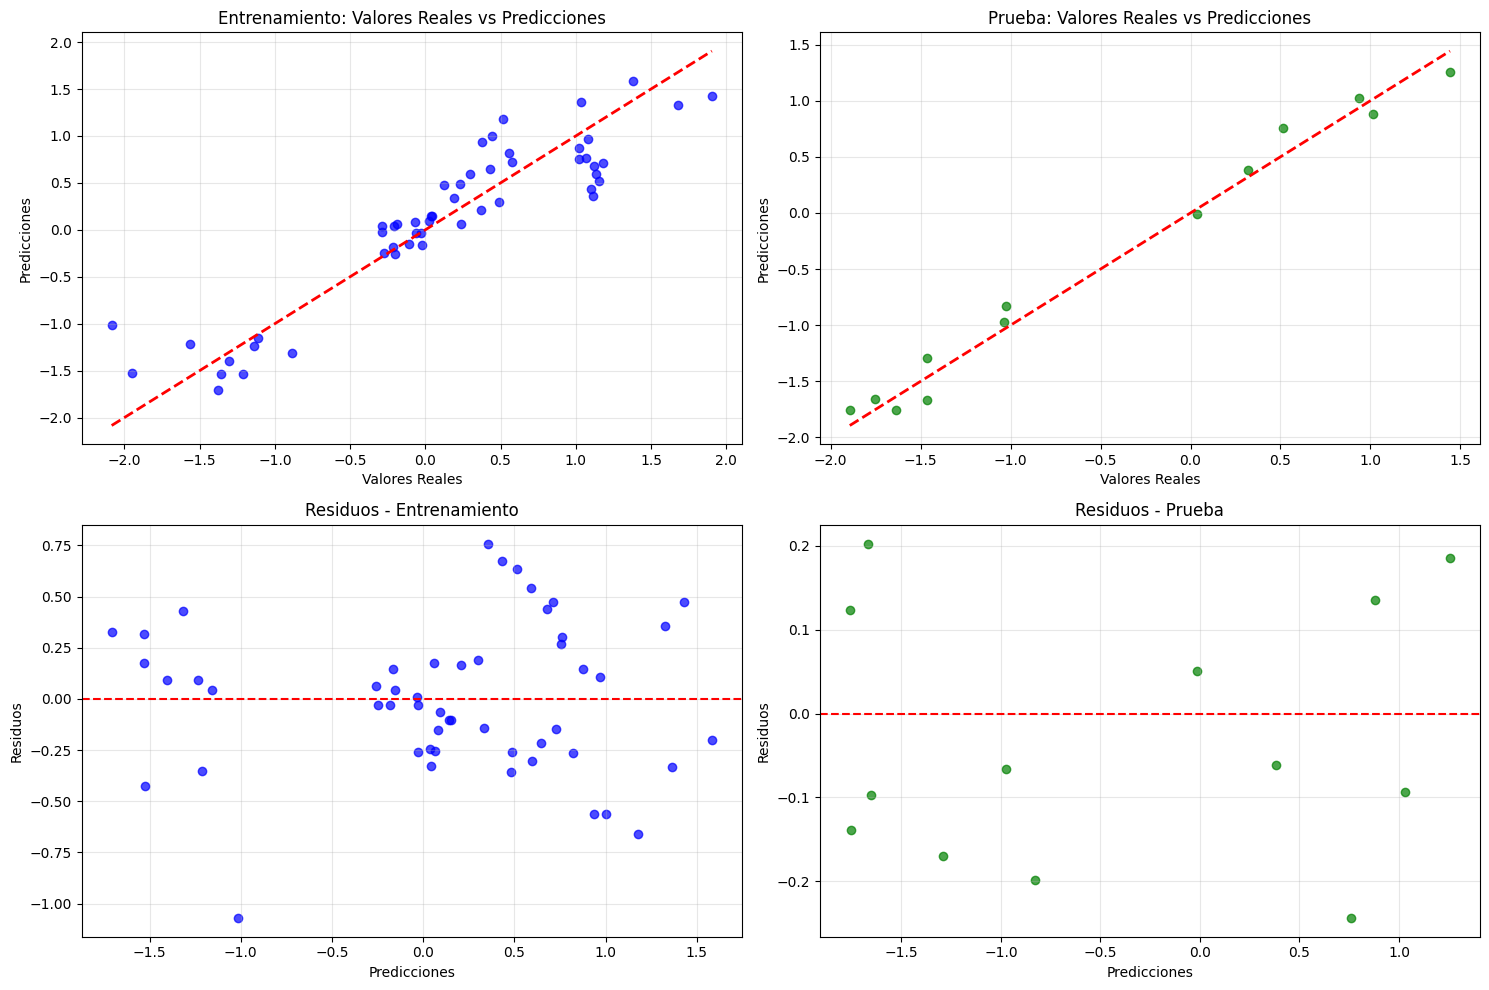

(LinearRegression(),
 {'r2_train': 0.8477489280248485,
  'r2_test': 0.9835413269470524,
  'rmse_train': 0.3597501038756522,
  'rmse_test': 0.14809974620340843,
  'mae_train': 0.2869018706612081,
  'mae_test': 0.13600161709499514,
  'r2_adjusted': 0.83479138998441})

In [11]:
df3 = df.drop(['igae', 'exportaciones', 'inversion_total'], axis=1)
crear_y_evaluar_modelo_completo(df3)

*Modelo sin variables: igae, exportaciones,importaciones e inversion total*

Tamaño del conjunto de entrenamiento: 52
Tamaño del conjunto de prueba: 13
EVALUACIÓN DEL MODELO DE REGRESIÓN MÚLTIPLE

1. COEFICIENTES DEL MODELO:
Intercepto: 0.0371
precio_petroleo: 0.1512
consumo_final: 0.7885
tasa_inflacion: 0.2804

2. MÉTRICAS DE ENTRENAMIENTO:
R² Score: 0.7902
RMSE: 0.4223
MAE: 0.3301

3. MÉTRICAS DE PRUEBA:
R² Score: 0.9222
RMSE: 0.3220
MAE: 0.2960

4. R² AJUSTADO: 0.7771

5. ANÁLISIS DE RESIDUOS:
Test de Normalidad (Shapiro-Wilk): p-valor = 0.9901
Los residuos siguen una distribución normal (p > 0.05)
Media de residuos: 0.000000
Desviación estándar de residuos: 0.4223
Estadístico Durbin-Watson: 2.0133
No hay evidencia fuerte de autocorrelación


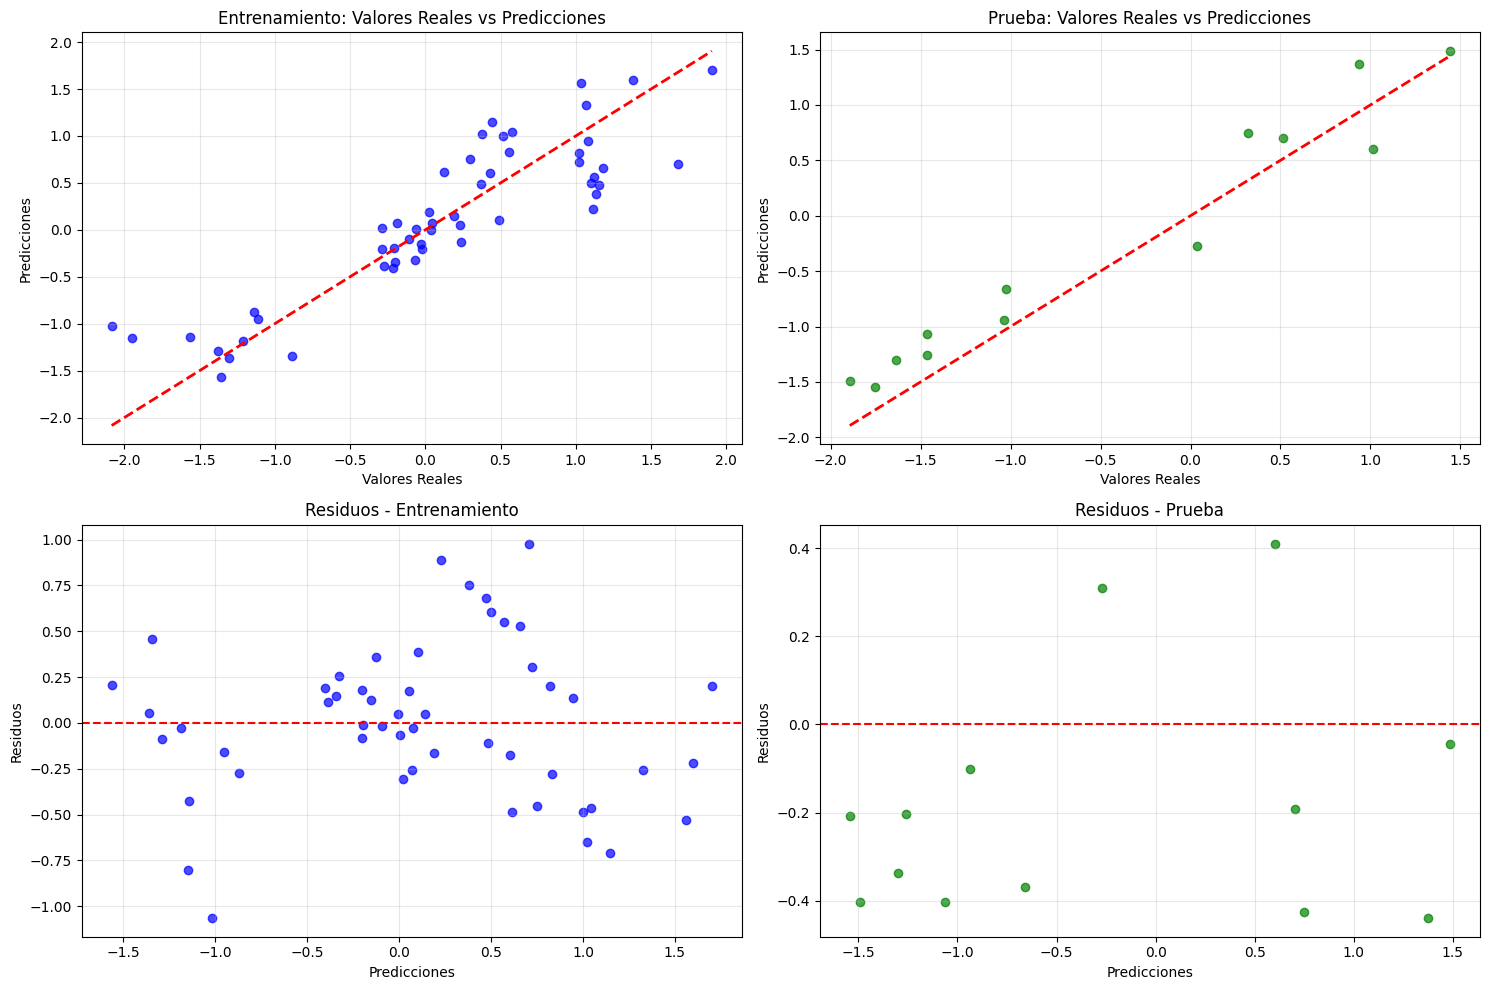

(LinearRegression(),
 {'r2_train': 0.7902471220539723,
  'r2_test': 0.9222185784872005,
  'rmse_train': 0.4222549142345919,
  'rmse_test': 0.3219547546422831,
  'mae_train': 0.330081384064855,
  'mae_test': 0.29599435527496243,
  'r2_adjusted': 0.7771375671823456})

In [12]:
df4 = df.drop(['igae', 'exportaciones','importaciones', 'inversion_total'], axis=1)
crear_y_evaluar_modelo_completo(df4)

*Modelo sin variables: igae, exportaciones,consumo final e inversion total*

Tamaño del conjunto de entrenamiento: 52
Tamaño del conjunto de prueba: 13
EVALUACIÓN DEL MODELO DE REGRESIÓN MÚLTIPLE

1. COEFICIENTES DEL MODELO:
Intercepto: 0.0169
importaciones: 0.5378
precio_petroleo: 0.0018
tasa_inflacion: 0.2512

2. MÉTRICAS DE ENTRENAMIENTO:
R² Score: 0.4719
RMSE: 0.6700
MAE: 0.4648

3. MÉTRICAS DE PRUEBA:
R² Score: 0.5099
RMSE: 0.8082
MAE: 0.6851

4. R² AJUSTADO: 0.4389

5. ANÁLISIS DE RESIDUOS:
Test de Normalidad (Shapiro-Wilk): p-valor = 0.0221
Los residuos NO siguen una distribución normal (p ≤ 0.05)
Media de residuos: -0.000000
Desviación estándar de residuos: 0.6700
Estadístico Durbin-Watson: 1.8658
No hay evidencia fuerte de autocorrelación


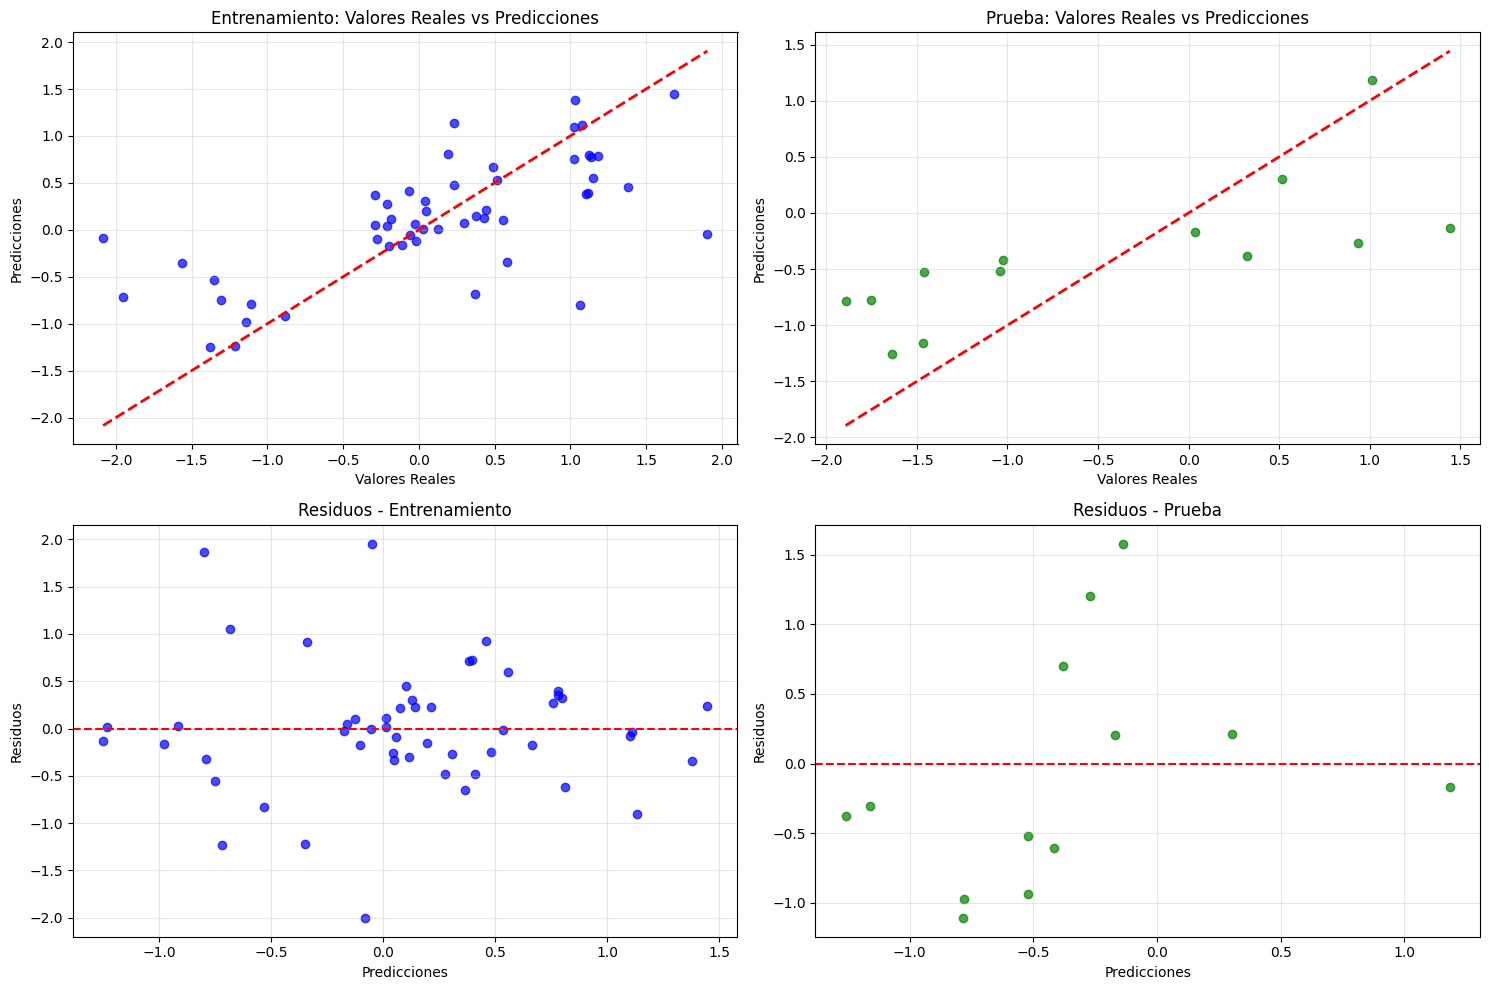

(LinearRegression(),
 {'r2_train': 0.4718745640507801,
  'r2_test': 0.509901733521644,
  'rmse_train': 0.6700223516991209,
  'rmse_test': 0.8081621161847342,
  'mae_train': 0.46483785527122595,
  'mae_test': 0.6851172217557817,
  'r2_adjusted': 0.4388667243039538})

In [13]:
df5 = df.drop(['igae', 'exportaciones','consumo_final', 'inversion_total'], axis=1)
crear_y_evaluar_modelo_completo(df5)